# Práctica sobre correlación y convolución
## Objetivos:
1. Implementar y entender el concepto de correlación como instrumento para detectar retrasos en una señal.

2. Implementar y entender el concepto de convolución como instrumento para aplicar efectos específicos en una señal determinada.

3. Utilizar el concepto de convolución para filtrar ruido de una señal determinada.

NOTA: Avance mínimo durante la sesión: identificar la anomalía en la señal y eliminarla.




# 1. Correlación

El archivo "corrupted_audio.wav" ha sufrido de un error que deterioró la señal de audio.

1. Reproduzca la señal, escúchela detenidamente usando audífonos y describa el problema (tenga en cuenta que se trata de una señal de audio estéreo, es decir, hay una señal para cada oido). Diga qué anomalía percibe en el audio.

2. Grafique en un mismo eje ambos canales de la señal. ¿Logra ahora evidenciar la anomalía en la señal? ¿Cuál es?

3. Seleccione un segmento de entre 2 y 3 segundos de duración y realice la correlación entre el canal izquierdo y el canal derecho del segmento. ¿Que informacion importante nos puede brindar esta operación?

4. Usando la información anterior, corrija el problema del archivo de audio. Guarde la señal corregida en formato .wav y permita su reproducción en colab. Realice también la gráfica de ambos canales. Puede usar la función 'x_new=copy.deepcopy(x)' para guardar una nueva versión del audio y hacer la correción.

Audio Con error


Grafica del Audio


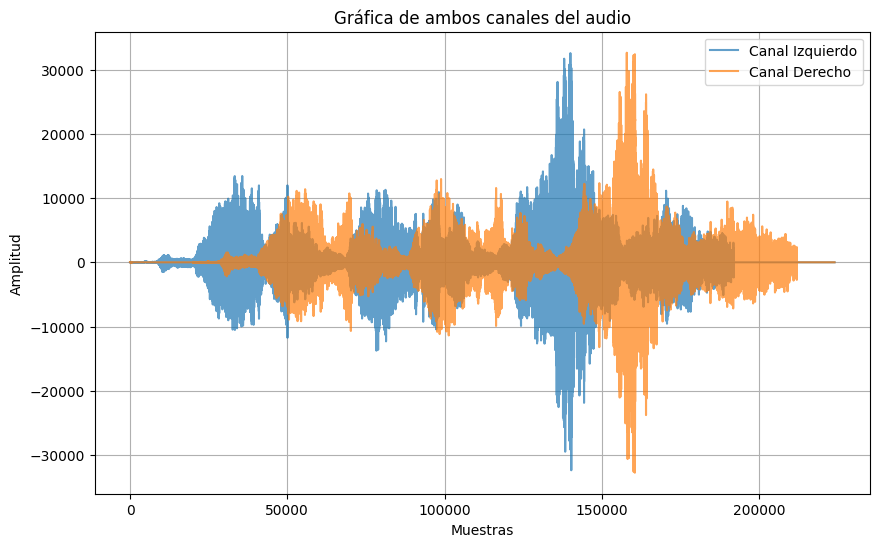

Correlacion del audio entre segundos 9-11


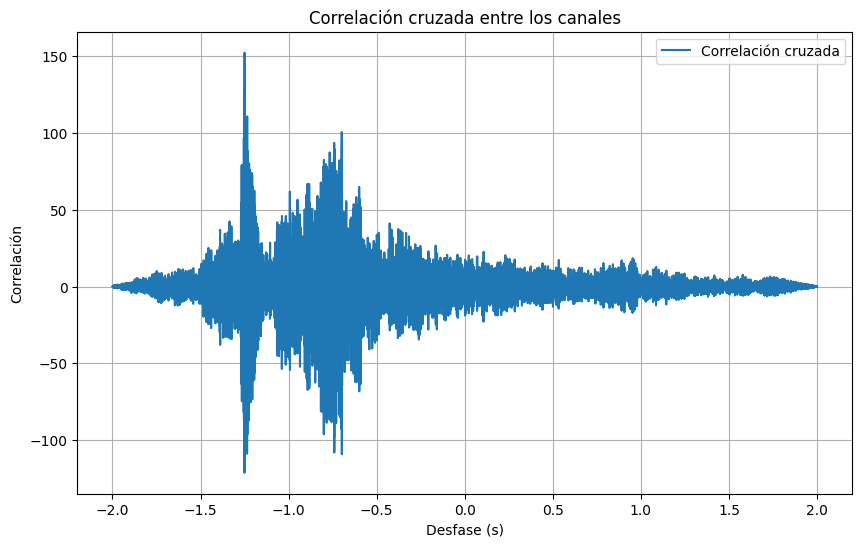

El desfase máximo ocurre en tau = -1.2501 segundos.
Correccion del audio


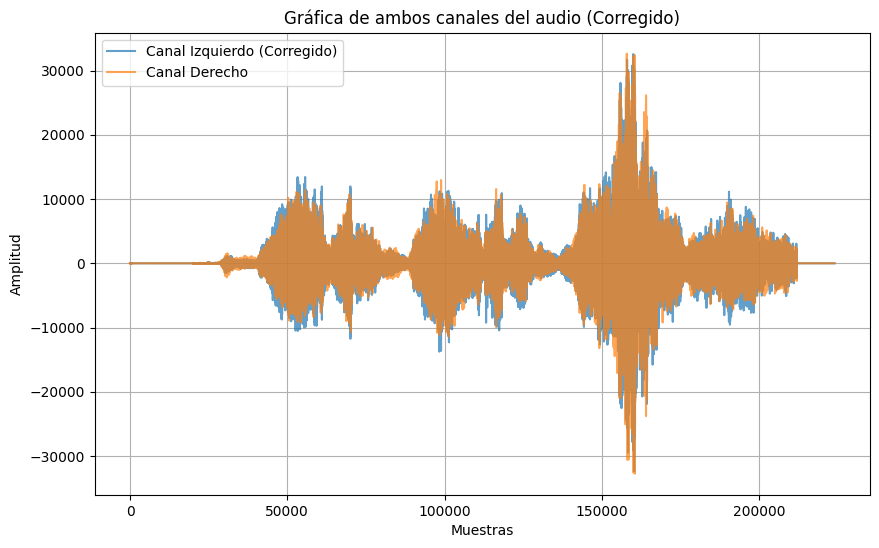

Audio corregido exportado como: audio_corregido.wav


In [2]:
from IPython.display import Audio, display
import numpy as np
from scipy.io.wavfile import read
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
def ejercicio1_1(ruta_archivo):
 
    display(Audio(ruta_archivo, autoplay=True))

#error segundo 9-10


def ejercicio1_2(ruta_archivo):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Graficar ambos canales
        plt.figure(figsize=(10, 6))
        plt.plot(data[:, 0], label="Canal Izquierdo", alpha=0.7)
        plt.plot(data[:, 1], label="Canal Derecho", alpha=0.7)
        plt.title("Gráfica de ambos canales del audio")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("El audio no es estéreo.")
# el error mas claro que hay es un delay de 20000 muestras
def ejercicio1_3(ruta_archivo, inicio_seg=9, fin_seg=11):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Seleccionar el segmento de interés
        inicio_muestra = int(inicio_seg * fs)
        fin_muestra = int(fin_seg * fs)
        canal_izquierdo = data[inicio_muestra:fin_muestra, 0]
        canal_derecho = data[inicio_muestra:fin_muestra, 1]
        
        # Normalizar los canales
        canal_izquierdo = canal_izquierdo - np.mean(canal_izquierdo)
        canal_izquierdo = canal_izquierdo / np.max(np.abs(canal_izquierdo))
        canal_derecho = canal_derecho - np.mean(canal_derecho)
        canal_derecho = canal_derecho / np.max(np.abs(canal_derecho))
        
        # Calcular la correlación cruzada usando np.correlate
        correlacion = np.correlate(canal_izquierdo, canal_derecho, mode='full')
        lags = np.arange(-len(canal_izquierdo) + 1, len(canal_derecho))
        
        # Graficar la correlación cruzada
        plt.figure(figsize=(10, 6))
        plt.plot(lags / fs, correlacion, label="Correlación cruzada")
        plt.title("Correlación cruzada entre los canales")
        plt.xlabel("Desfase (s)")
        plt.ylabel("Correlación")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Encontrar el desfase máximo
        desfase_maximo = lags[np.argmax(correlacion)] / fs
        print(f"El desfase máximo ocurre en tau = {desfase_maximo:.4f} segundos.")
    else:
        print("El audio no es estéreo.")
def ejercicio1_4(ruta_archivo, desfase_seg=1.25, salida_archivo="audio_corregido.wav"):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Calcular el desfase en muestras
        desfase_muestras = int(desfase_seg * fs)
        
        # Desfazar el canal izquierdo usando np.roll
        canal_izquierdo_desfasado = np.roll(data[:, 0], desfase_muestras)
        
        # Crear una nueva señal con el canal izquierdo desfasado
        data_corregida = np.copy(data)
        data_corregida[:, 0] = canal_izquierdo_desfasado
        
        # Graficar ambos canales corregidos
        plt.figure(figsize=(10, 6))
        plt.plot(data_corregida[:, 0], label="Canal Izquierdo (Corregido)", alpha=0.7)
        plt.plot(data_corregida[:, 1], label="Canal Derecho", alpha=0.7)
        plt.title("Gráfica de ambos canales del audio (Corregido)")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Exportar el audio corregido
        write(salida_archivo, fs, data_corregida)
        print(f"Audio corregido exportado como: {salida_archivo}")
        display(Audio(salida_archivo, autoplay=True))
    else:
        print("El audio no es estéreo.")
print("Audio Con error")
ejercicio1_1("corrupted_audio.wav")
print("Grafica del Audio")        
ejercicio1_2("corrupted_audio.wav")
print("Correlacion del audio entre segundos 9-11")
ejercicio1_3("corrupted_audio.wav")
print("Correccion del audio")
ejercicio1_4("corrupted_audio.wav")

## Hints:
use la función "np.correlate"

use la función "np.roll" para desplazar y compensar el desfase entre las señales.

puede usar la función "write("audio_out.wav", fs, data)" de la librería "scipy.io.wavfile" para generar la señal de audio en formato .wav

# Correlación con señales en presencia de ruido

El retraso entre los dos canales del ejercicio anterior podría haber sido identificado visualmente comparando las gráficas de las señales en el tiempo. ¿Esto sería posible aún con la señal "noisy_audio.wav", la cual además del desfase presenta ruido de "alta" frecuencia [12kHz a 20kHz]?
Repita todo el proceso anterior para comprobar que el proceso usando la correlación funciona a pesar del ruido.

Audio Con error


Grafica del Audio


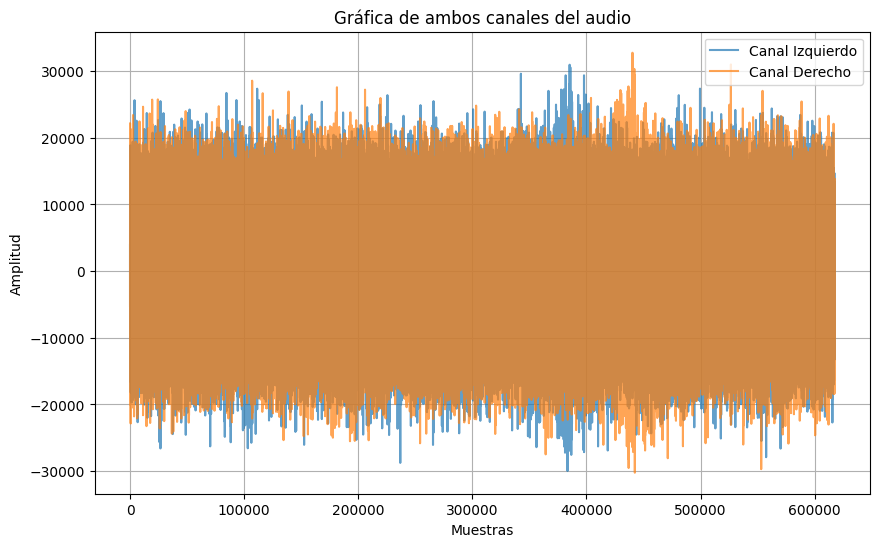

Correlacion del audio entre segundos 9-11


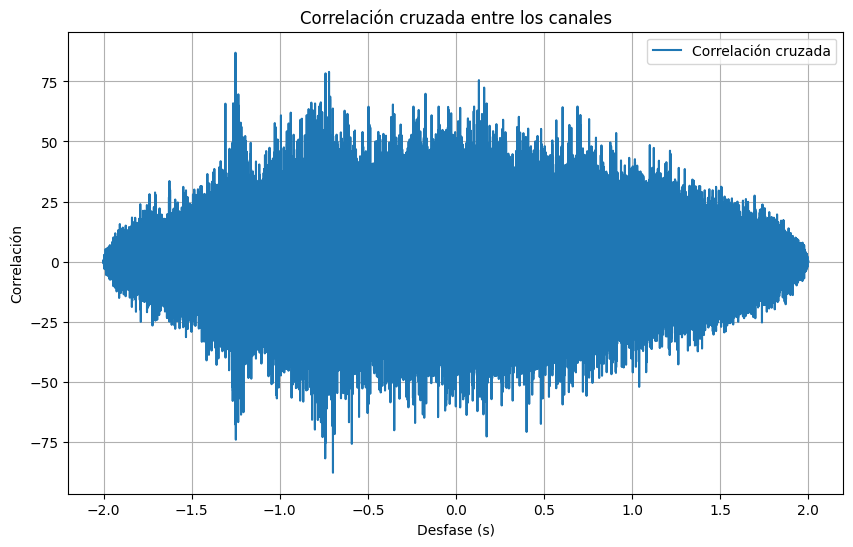

El desfase máximo ocurre en tau = -1.2515 segundos.
Correccion del audio


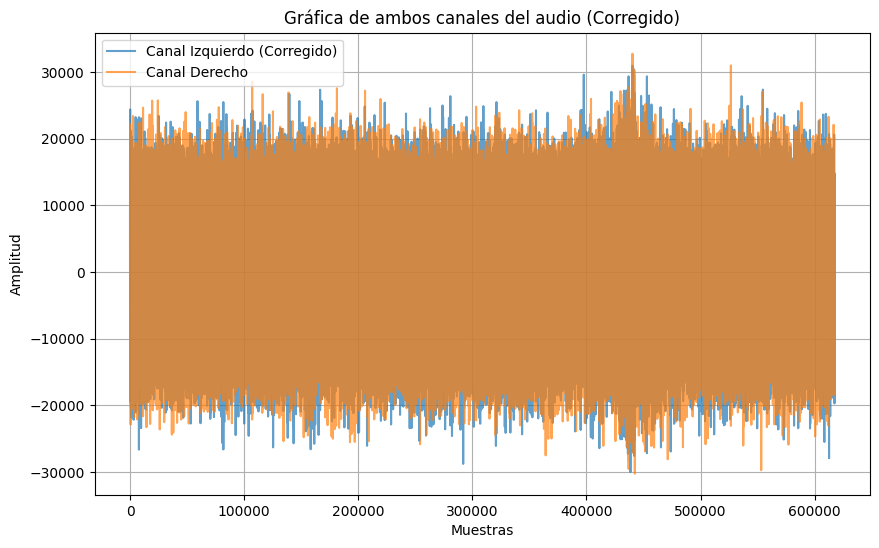

Audio corregido exportado como: audio_corregido2.wav


In [3]:
def ejercicio2_1(ruta_archivo):
     
    display(Audio(ruta_archivo, autoplay=True))

#error segundo 9-10


def ejercicio2_2(ruta_archivo):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Graficar ambos canales
        plt.figure(figsize=(10, 6))
        plt.plot(data[:, 0], label="Canal Izquierdo", alpha=0.7)
        plt.plot(data[:, 1], label="Canal Derecho", alpha=0.7)
        plt.title("Gráfica de ambos canales del audio")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
    else:
        print("El audio no es estéreo.")
# el error mas claro que hay es un delay de 20000 muestras
def ejercicio2_3(ruta_archivo, inicio_seg=9, fin_seg=11):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Seleccionar el segmento de interés
        inicio_muestra = int(inicio_seg * fs)
        fin_muestra = int(fin_seg * fs)
        canal_izquierdo = data[inicio_muestra:fin_muestra, 0]
        canal_derecho = data[inicio_muestra:fin_muestra, 1]
        
        # Normalizar los canales
        canal_izquierdo = canal_izquierdo - np.mean(canal_izquierdo)
        canal_izquierdo = canal_izquierdo / np.max(np.abs(canal_izquierdo))
        canal_derecho = canal_derecho - np.mean(canal_derecho)
        canal_derecho = canal_derecho / np.max(np.abs(canal_derecho))
        
        # Calcular la correlación cruzada usando np.correlate
        correlacion = np.correlate(canal_izquierdo, canal_derecho, mode='full')
        lags = np.arange(-len(canal_izquierdo) + 1, len(canal_derecho))
        
        # Graficar la correlación cruzada
        plt.figure(figsize=(10, 6))
        plt.plot(lags / fs, correlacion, label="Correlación cruzada")
        plt.title("Correlación cruzada entre los canales")
        plt.xlabel("Desfase (s)")
        plt.ylabel("Correlación")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Encontrar el desfase máximo
        desfase_maximo = lags[np.argmax(correlacion)] / fs
        print(f"El desfase máximo ocurre en tau = {desfase_maximo:.4f} segundos.")
    else:
        print("El audio no es estéreo.")
def ejercicio2_4(ruta_archivo, desfase_seg=1.25, salida_archivo="audio_corregido2.wav"):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Calcular el desfase en muestras
        desfase_muestras = int(desfase_seg * fs)
        
        # Desfazar el canal izquierdo usando np.roll
        canal_izquierdo_desfasado = np.roll(data[:, 0], desfase_muestras)
        
        # Crear una nueva señal con el canal izquierdo desfasado
        data_corregida = np.copy(data)
        data_corregida[:, 0] = canal_izquierdo_desfasado
        
        # Graficar ambos canales corregidos
        plt.figure(figsize=(10, 6))
        plt.plot(data_corregida[:, 0], label="Canal Izquierdo (Corregido)", alpha=0.7)
        plt.plot(data_corregida[:, 1], label="Canal Derecho", alpha=0.7)
        plt.title("Gráfica de ambos canales del audio (Corregido)")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Exportar el audio corregido
        write(salida_archivo, fs, data_corregida)
        print(f"Audio corregido exportado como: {salida_archivo}")
        display(Audio(salida_archivo, autoplay=True))
    else:
        print("El audio no es estéreo.")
print("Audio Con error")
ejercicio2_1("noisy_audio.wav")
print("Grafica del Audio")        
ejercicio2_2("noisy_audio.wav")
print("Correlacion del audio entre segundos 9-11")
ejercicio2_3("noisy_audio.wav")
print("Correccion del audio")
ejercicio2_4("Noisy_audio.wav")

# Convolución & Filtrado
Para eliminar el ruido del ejercicio anterior utilice un filtro pasabajas.

1. Use la siguiente expresión para generar la respuesta natural del filtro con una frecuencia de corte de 10 kHz. Use un intervalo de tiempo simétrico de longitud igual al audio completo.

$$h_f(t)=\frac{sinc(2 \cdot f_{corte} \cdot t)}{2}$$

2. Gráfique la respuesta natural del filtro en el intervalo [-1ms , 1ms]
3. Utilice la operación de convolución para filtrar cada canal de audio ruidoso. (Use el método convolve de numpy con el parametro 'same')
Grafique los canales y reproduzca el audio filtrado. Use la función 'np.vstack' para concatenar los dos canales que filtró. ¿Fue efectivo el filtro?

In [ ]:
def generar_respuesta_filtro(frecuencia_corte, tiempo):
    return np.sinc(2 * frecuencia_corte * tiempo) / 2

def graficar_respuesta_filtro(tiempo, respuesta_filtro):
    plt.figure(figsize=(10, 6))
    plt.plot(tiempo * 1000, respuesta_filtro, label="h_f(t)")
    plt.title("Respuesta natural del filtro")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.legend()
    plt.xlim([-1, 1])  # Limitar el intervalo de tiempo a [-1ms, 1ms]
    plt.show()

def filtrar_audio(ruta_audio, respuesta_filtro, archivo_salida="audio_filtrado.wav"):
    frecuencia_muestreo, datos = read(ruta_audio)
    if len(datos.shape) == 2:
        # Filtrar cada canal usando convolución
        canal_izquierdo_filtrado = np.convolve(datos[:, 0], respuesta_filtro, mode='same')
        canal_derecho_filtrado = np.convolve(datos[:, 1], respuesta_filtro, mode='same')
        
        # Concatenar los canales filtrados
        datos_filtrados = np.vstack((canal_izquierdo_filtrado, canal_derecho_filtrado)).T
        
        # Normalizar la señal filtrada
        datos_filtrados = datos_filtrados / np.max(np.abs(datos_filtrados))
        
        # Exportar el audio filtrado
        write(archivo_salida, frecuencia_muestreo, (datos_filtrados * 32767).astype(np.int16))
        print(f"Audio filtrado exportado como: {archivo_salida}")
        
        # Graficar ambos canales filtrados
        plt.figure(figsize=(10, 6))
        plt.plot(datos_filtrados[:, 0], label="Canal Izquierdo (Filtrado)", alpha=0.7)
        plt.plot(datos_filtrados[:, 1], label="Canal Derecho (Filtrado)", alpha=0.7)
        plt.title("Gráfica de ambos canales del audio (Filtrado)")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Reproducir el audio filtrado
        display(Audio(archivo_salida, autoplay=True))
    else:
        print("El audio no es estéreo.")


h_f = generar_respuesta_filtro(fc, t)
graficar_respuesta_filtro(t, h_f)
filtrar_audio("noisy_audio.wav", h_f, "audio_filtrado.wav")
    else:
        print("El audio no es estéreo.")

IndentationError: unexpected indent (2101204048.py, line 71)

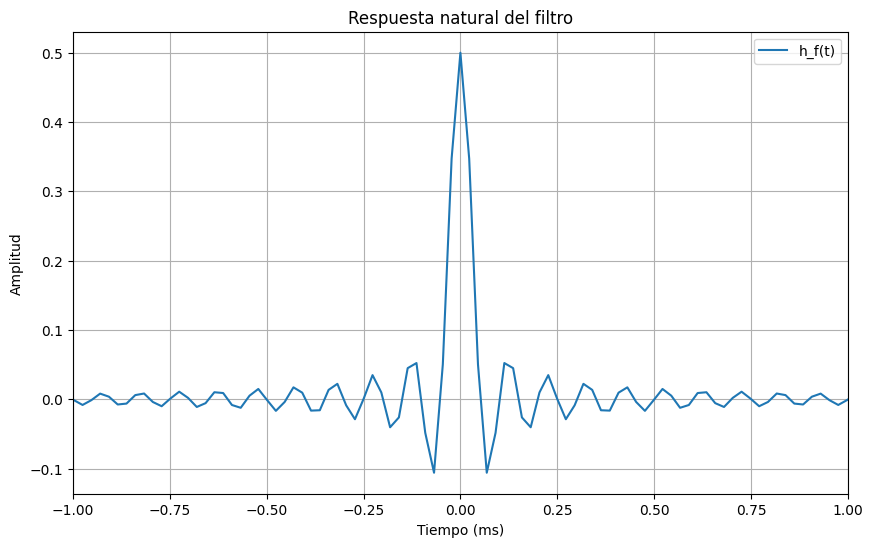

In [12]:
def ejercicio3_1(fc=10000, fs=44100, t=None, h_f=None):

    if t is None:
        t = np.arange(-1.0, 1.0, 1.0 / fs)  # Generar intervalo de tiempo simétrico
    if h_f is None:
        h_f = np.sinc(2 * fc * t) / 2  # Calcular la respuesta natural del filtro

    # Graficar la respuesta natural del filtro en el intervalo [-1ms, 1ms]
    plt.figure(figsize=(10, 6))
    plt.plot(t * 1000, h_f, label="h_f(t)")
    plt.title("Respuesta natural del filtro")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.legend()
    plt.xlim([-1, 1])  # Limitar el intervalo de tiempo a [-1ms, 1ms]
    plt.show()

# Llamar a la función con las variables existentes
ejercicio3_1()

In [13]:
def ejercicio3_2(ruta_archivo, fc=10000, salida_archivo="audio_filtrado3.wav"):
    # Leer el archivo de audio
    fs, data = read(ruta_archivo)
    
    # Verificar si el audio es estéreo
    if len(data.shape) == 2:
        # Crear el intervalo de tiempo simétrico
        t = np.arange(-1.0, 1.0, 1.0 / fs)
        
        # Generar la respuesta natural del filtro
        h_f = np.sinc(2 * fc * t) / 2
        
        # Filtrar cada canal usando convolución
        canal_izquierdo_filtrado = np.convolve(data[:, 0], h_f, mode='same')
        canal_derecho_filtrado = np.convolve(data[:, 1], h_f, mode='same')
        
        # Concatenar los canales filtrados
        data_filtrada = np.vstack((canal_izquierdo_filtrado, canal_derecho_filtrado)).T
        
        # Normalizar la señal filtrada
        data_filtrada = data_filtrada / np.max(np.abs(data_filtrada))
        
        # Exportar el audio filtrado
        write(salida_archivo, fs, (data_filtrada * 32767).astype(np.int16))
        print(f"Audio filtrado exportado como: {salida_archivo}")
        
        # Graficar ambos canales filtrados
        plt.figure(figsize=(10, 6))
        plt.plot(data_filtrada[:, 0], label="Canal Izquierdo (Filtrado)", alpha=0.7)
        plt.plot(data_filtrada[:, 1], label="Canal Derecho (Filtrado)", alpha=0.7)
        plt.title("Gráfica de ambos canales del audio (Filtrado)")
        plt.xlabel("Muestras")
        plt.ylabel("Amplitud")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Reproducir el audio filtrado
        display(Audio(salida_archivo, autoplay=True))
    else:
        print("El audio no es estéreo.")
ejercicio3_1("noisy_audio.wav")

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U30'), dtype('float64')) -> None

## Hints:
Puede utilizar la función "np.convolve" para efectuar la convolución lineal entre dos señales. También puede utilizar la función "scipy.signal.fftconvolve" si quiere aprovechar la velocidad de la transformada rápida de Fourier.

Recuerde siempre normalizar las señales (eliminar la media y dividir por el máximo) antes de efectuar algún procedimiento.

# Reverberación

Los archivos "eco1.wav", "church.wav", "Brno_fs.wav" corresponden a grabaciones de sonidos de disparos de pistola, para los primeros dos casos, y aplauso para el tercer caso. Estos sonidos son utilizados para representar impulsos en tres diferentes ambientes: una habitación, una catedral, y los tanques de agua de Brno. El audio "a.wav" corresponde a la producción de la vocal /a/ de forma sostenida en un ambiente sin eco.

1. Grafique la forma de onda de los disparos y reprodúzcalos.

2. Grafique la forma de onda del audio "a.wav" y reprodúzcalo.

3. Considerando cada ambiente como un sistema LTI, haga los procedimientos necesarios para escuchar el audio "a.wav" como si hubiera sido grabado en cada uno de estos ambientes. Reproduzca y escuche las tres señales resultantes. Compare con el audio original.

4. Considere el audio "Gregoriano.wav", reprodúzcalo y luego efectúe los procedimientos necesarios para que éste se escuche como si hubiera sido grabado en los tanques de la ciudad de Brno.

5. Considere el archivo de audio "Eminem_segment.wav". Reprodúzcalo y luego efectúe los procedimientos necesarios para que éste se escuche como si hubiera sido grabado en los tanques de la ciudad de Brno.